# IMPORT DATASET

In [1]:
import pandas as pd
# Import the Excel data file
csv_file_path = r"C:\Users\Administrator\Desktop\dataset\E commerce business transactions.csv"
data = pd.read_csv(csv_file_path)
# Display the data
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Customer ID,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [2]:
data.shape

(536350, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   Customer ID    536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


# DESCRIPTIVE STATISTICS

In [4]:
# Generating descriptive statistics
descriptive_stats = data.drop(columns='Customer ID').describe(include='all', datetime_is_numeric=True)
descriptive_stats

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country
count,536350,536350,536350,536350,536350.000000,536350.000000,536350
unique,23204,305,3768,3768,NaN,NaN,38
top,573585,12/5/2019,85123A,Cream Hanging Heart T-Light Holder,NaN,NaN,United Kingdom
freq,1111,5299,2378,2378,NaN,NaN,485095
mean,NaN,NaN,NaN,NaN,12.662182,9.919347,NaN
std,NaN,NaN,NaN,NaN,8.490450,216.662300,NaN
min,NaN,NaN,NaN,NaN,5.130000,-80995.000000,NaN
25%,NaN,NaN,NaN,NaN,10.990000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,11.940000,3.000000,NaN
75%,NaN,NaN,NaN,NaN,14.090000,10.000000,NaN


# DATA CLEANSING AND PREPROCESSING

In [5]:
# Checking for missing values
missing_values = data.isnull().sum()
# Data types of each column
data_types = data.dtypes
missing_values, data_types

(TransactionNo     0
 Date              0
 ProductNo         0
 ProductName       0
 Price             0
 Quantity          0
 Customer ID      55
 Country           0
 dtype: int64,
 TransactionNo     object
 Date              object
 ProductNo         object
 ProductName       object
 Price            float64
 Quantity           int64
 Customer ID      float64
 Country           object
 dtype: object)

In [6]:
# Removing rows with missing Customer ID values
ecommerce_cleaned = data.dropna(subset=['Customer ID'])
# Converting the 'Date' column to datetime format
ecommerce_cleaned['Date'] = pd.to_datetime(ecommerce_cleaned['Date'], format='%m/%d/%Y')
# Checking for duplicate entries
duplicates = ecommerce_cleaned.duplicated().sum()
# Displaying the number of duplicates and the first few rows of the cleaned data
duplicates, ecommerce_cleaned.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13284\4014683208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_cleaned['Date'] = pd.to_datetime(ecommerce_cleaned['Date'], format='%m/%d/%Y')


(5200,
   TransactionNo       Date ProductNo                          ProductName  \
 0        581482 2019-12-09     22485        Set Of 2 Wooden Market Crates   
 1        581475 2019-12-09     22596  Christmas Star Wish List Chalkboard   
 2        581475 2019-12-09     23235             Storage Tin Vintage Leaf   
 3        581475 2019-12-09     23272    Tree T-Light Holder Willie Winkie   
 4        581475 2019-12-09     23239    Set Of 4 Knick Knack Tins Poppies   
 
    Price  Quantity  Customer ID         Country  
 0  21.47        12      17490.0  United Kingdom  
 1  10.65        36      13069.0  United Kingdom  
 2  11.53        12      13069.0  United Kingdom  
 3  10.65        12      13069.0  United Kingdom  
 4  11.94         6      13069.0  United Kingdom  )

# EDA

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13284\2638128490.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_cleaned['TotalSales'] = ecommerce_cleaned['Price'] * ecommerce_cleaned['Quantity']


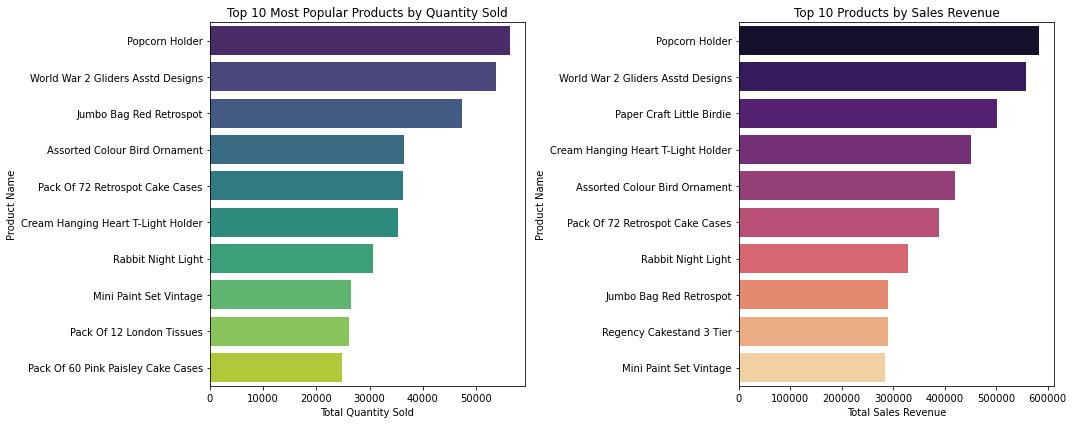

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Product Analysis
#Calculating the total quantity sold for each product
product_quantity = ecommerce_cleaned.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

#Calculating total sales (Price * Quantity) for each product
ecommerce_cleaned['TotalSales'] = ecommerce_cleaned['Price'] * ecommerce_cleaned['Quantity']
product_sales = ecommerce_cleaned.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plotting the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(y=product_quantity.index, x=product_quantity.values, palette="viridis")
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')

plt.subplot(1, 2, 2)
sns.barplot(y=product_sales.index, x=product_sales.values, palette="magma")
plt.title('Top 10 Products by Sales Revenue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Product Name')

plt.tight_layout()
plt.show()

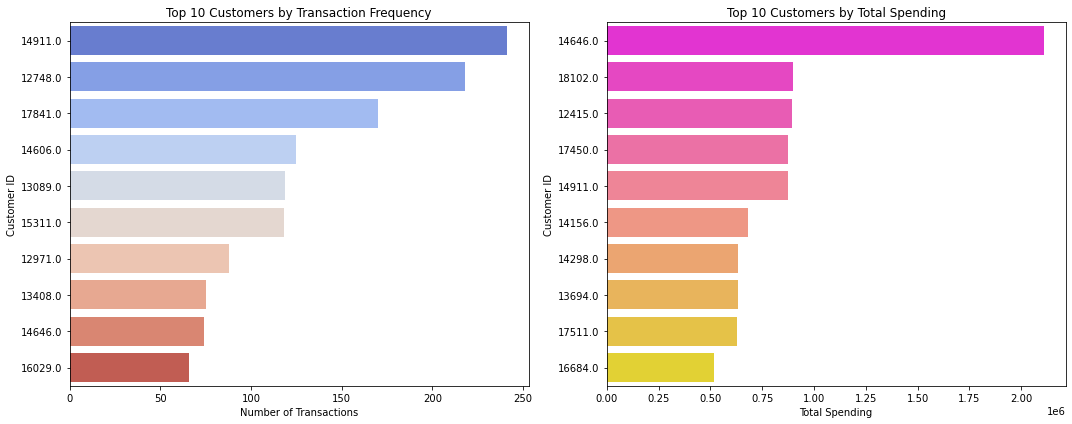

In [8]:
data['TotalSales'] = data['Price'] * data['Quantity']

# Customer Analysis
# Segmenting customers based on transaction frequency
customer_frequency = data.groupby('Customer ID')['TransactionNo'].nunique().sort_values(ascending=False).head(10)

# Segmenting customers based on total spending
customer_spending = data.groupby('Customer ID')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plotting the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(y=customer_frequency.index.astype(str), x=customer_frequency.values, palette="coolwarm")
plt.title('Top 10 Customers by Transaction Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer ID')

plt.subplot(1, 2, 2)
sns.barplot(y=customer_spending.index.astype(str), x=customer_spending.values, palette="spring")
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer ID')

plt.tight_layout()
plt.show()

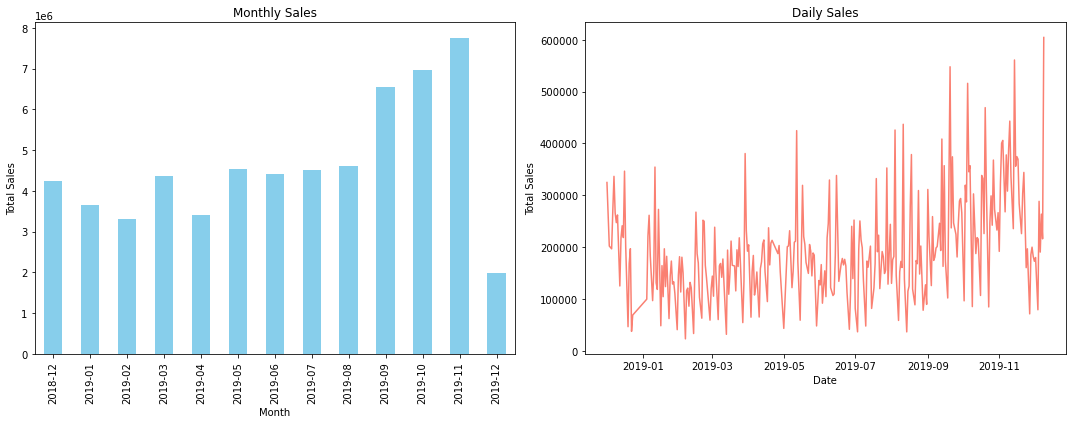

In [9]:
# Temporal Analysis
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Grouping data by month
data['Month'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalSales'].sum()

# Grouping data by day
daily_sales = data.groupby(data['Date'].dt.date)['TotalSales'].sum()

# Plotting the results
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
daily_sales.plot(color='salmon')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

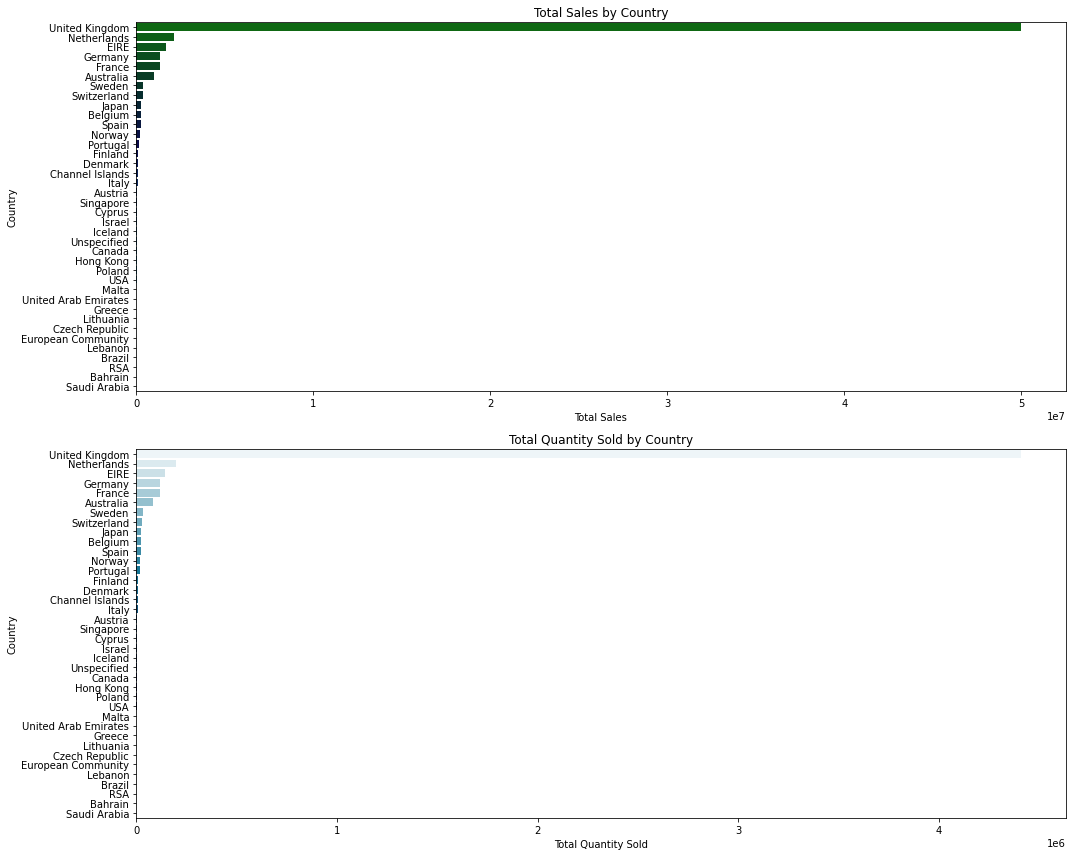

In [10]:
# Geographical Analysis

# Calculating total sales by country
country_sales = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Calculating total quantity sold by country
country_quantity = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.barplot(y=country_sales.index, x=country_sales.values, palette="ocean")
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')

plt.subplot(2, 1, 2)
sns.barplot(y=country_quantity.index, x=country_quantity.values, palette="ocean_r")
plt.title('Total Quantity Sold by Country')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

Average Basket Size: 23.11 products per transaction


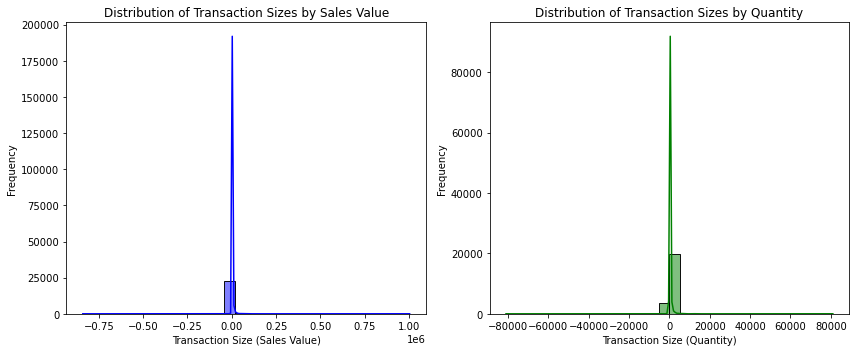

In [11]:
import seaborn as sns

data['TotalSales'] = data['Price'] * data['Quantity']

# Transaction Analysis
#Calculate Average Basket Size
average_basket_size = data.groupby('TransactionNo')['ProductName'].count().mean()
print(f"Average Basket Size: {average_basket_size:.2f} products per transaction")

# Analyze Transaction Size Distribution
# By Sales Value
transaction_sales_distribution = data.groupby('TransactionNo')['TotalSales'].sum()
# By Quantity
transaction_quantity_distribution = data.groupby('TransactionNo')['Quantity'].sum()

# Visualizing the distribution of transaction sizes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(transaction_sales_distribution, bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Sizes by Sales Value')
plt.xlabel('Transaction Size (Sales Value)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(transaction_quantity_distribution, bins=30, kde=True, color='green')
plt.title('Distribution of Transaction Sizes by Quantity')
plt.xlabel('Transaction Size (Quantity)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
#Calculate the total quantity for each customer
customer_total_quantity = data.groupby('Customer ID')['Quantity'].sum()

#Calculate the average quantity per customer
average_quantity_per_customer = customer_total_quantity.mean()
print(f"Average Quantity Per Customer: {average_quantity_per_customer:.2f}")

#Calculate the total spending for each customer
customer_total_spending = data.groupby('Customer ID')['TotalSales'].sum()

# Calculate the average spending per customer
average_spending_per_customer = customer_total_spending.mean()
print(f"Average Spending Per Customer: {average_spending_per_customer:.2f}")

Average Quantity Per Customer: 1123.29
Average Spending Per Customer: 12726.44


In [13]:
#Group by 'Customer ID'
grouped = data.groupby('Customer ID')

#Aggregate the required metrics
customer_behavior = grouped.agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Spending=('TotalSales', 'sum'),
    Number_of_Transactions=('TransactionNo', 'nunique')
)

# Calculate the Average Price Per Item for each customer
customer_behavior['Average_Price_Per_Item'] = customer_behavior['Total_Spending'] / customer_behavior['Total_Quantity']

#Resetting index to make 'Customer ID' a column
customer_behavior.reset_index(inplace=True)

#Display the first few rows of the DataFrame
customer_behavior.head()

,Customer ID,Total_Quantity,Total_Spending,Number_of_Transactions,Average_Price_Per_Item
0,12004.0,104,1509.60,1,14.515385
1,12006.0,2,24.76,1,12.380000
2,12008.0,421,5689.57,1,13.514418
3,12013.0,3,69.96,1,23.320000
4,12024.0,14,149.52,1,10.680000


# MARKET BASKET ANALYSIS (MBA)

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Assuming 'ecommerce_data' has a column 'TransactionNo' and 'ProductName'

#Data Preparation
transactions = data.groupby('TransactionNo')['ProductName'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

#Apply Apriori
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

#Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

#Filter for pairs and sort
# Filter for pairs
rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1) & rules['consequents'].apply(lambda x: len(x) == 1)]

#Sort by confidence, lift, or another metric
top_pairs = rules.sort_values(by='confidence', ascending=False).head(10)

#Creating a DataFrame for top 10 pairs
top_pairs_df = top_pairs[['antecedents', 'consequents', 'confidence', 'lift']]
top_pairs_df = top_pairs_df.reset_index(drop=True)

# Display the DataFrame
top_pairs.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(Pink Regency Teacup And Saucer),(Green Regency Teacup And Saucer),0.034520,0.045552,0.027754,0.803995,17.649858,0.026181,4.869506,0.977071
94,(Pink Regency Teacup And Saucer),(Roses Regency Teacup And Saucer),0.034520,0.048268,0.026461,0.766542,15.881104,0.024795,4.076672,0.970535
18,(Green Regency Teacup And Saucer),(Roses Regency Teacup And Saucer),0.045552,0.048268,0.033787,0.741722,15.366887,0.031589,3.684913,0.979546
12,(Gardeners Kneeling Pad Cup Of Tea),(Gardeners Kneeling Pad Keep Calm),0.032968,0.039821,0.023660,0.717647,18.021951,0.022347,3.400635,0.976713
19,(Roses Regency Teacup And Saucer),(Green Regency Teacup And Saucer),0.048268,0.045552,0.033787,0.700000,15.366887,0.031589,3.181492,0.982340


In [15]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Green),0.046587,0.043139,0.027840,0.597595,13.852737,0.025830,2.377854,0.973148
1,(Alarm Clock Bakelike Green),(Alarm Clock Bakelike Red),0.043139,0.046587,0.027840,0.645355,13.852737,0.025830,2.688357,0.969642
2,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Pink),0.046587,0.034434,0.020557,0.441258,12.814709,0.018953,1.728108,0.967015
3,(Alarm Clock Bakelike Pink),(Alarm Clock Bakelike Red),0.034434,0.046587,0.020557,0.596996,12.814709,0.018953,2.365768,0.954843
4,(Red Retrospot Charlotte Bag),(Charlotte Bag Pink Polkadot),0.045251,0.032753,0.022669,0.500952,15.294867,0.021186,1.938186,0.978915
